# Zoutoplossing in een tank

Een tank bevat 1000 liter puur water. Vanaf t=0 vloeit er met een constante snelheid van 6 L/min een zoutoplossing de tank in. Het water in de tank wordt goed geroerd. Aan de andere kant van de tank stroomt er ook weer water weg met een snelheid van 6 L/min. De concentratie van het zout in de instromende oplossing is 0.1 kg/L.

Voor deze opdracht werd er gevraagd om het verloop van de zoutconcentratie in de tank te plotten. Daarnaast is er gevraagd wat het verloop is wanneer het water er met 5 L/min uitstroomt i.p.v. 6 L/min.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Zonder Euler Method

Mijn eerste idee was om een Tank object te bouwen die door middel van een method genaamd 'update' zijn huidige zout concentratie zou updaten en direct alle informatie van zichzelf aanpast.  
Het ontwerp werkte naar behoren, echter was dit niet echt geprogrammeerd op een manier waarop de euler methode nadrukkelijk naar voren kwam.

In [2]:
class Tank(object):
    def __init__(self, volume, solution, in_rate, out_rate, conc_in):
        self.volume = volume
        self.solution_amount = solution
        self.in_rate = in_rate
        self.out_rate = out_rate
        self.conc_in = conc_in
        self.kg_salt_in = self.in_rate * self.conc_in
    
    def update(self):
        kg_in_tank = self.volume * self.solution_amount
        kg_out_flow = self.solution_amount * self.out_rate
        
        kg_in_tank += self.kg_salt_in - kg_out_flow
        self.volume += self.in_rate - self.out_rate
        self.solution_amount = kg_in_tank / self.volume

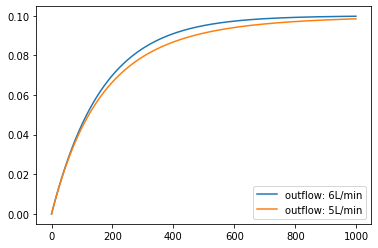

In [3]:
tank1 = Tank(1000, 0.0, 6, 6, 0.1)
tank2 = Tank(1000, 0.0, 6, 5, 0.1)

time_list = []
solution_rate1 = []
solution_rate2 = []

for i in range(0, 1000):
    time_list.append(i)
    solution_rate1.append(tank1.solution_amount)
    solution_rate2.append(tank2.solution_amount)
    
    tank1.update()
    tank2.update()


plt.plot(time_list, solution_rate1, label="outflow: 6L/min")
plt.plot(time_list, solution_rate2, label="outflow: 5L/min")

plt.legend()
plt.show()

## Met Euler Method

Om de euler methode nadrukkelijker naar voren te laten komen tijdens het plotten van het verloop in de zoutconcentratie is het proces nu opgedeeld in stappen.  
- Allereerst wordt de tijdstap geupdate.
- De volume van de tank wordt opnieuw berekend.
- De hoeveelheid zout in de tank (in kg) wordt berekend.
- Op basis van het volume en de hoeveelheid zout in de tank wordt de nieuwe concentratie berekend.

In [4]:
def forward_euler_tank(volume, liq_in, liq_out, conc_in):
    """Calculates the concentration of the tank over 2 hours"""
    
    num_steps = 1000
    h = 1
    
    t = np.zeros(num_steps + 1)  # The timesteps
    v = np.zeros(num_steps + 1)  # The volume of the tank
    k = np.zeros(num_steps + 1)  # The amount (kg) of salt in the tank
    c = np.zeros(num_steps + 1)  # The concentration in the tank
    
    # Set the initial values
    v[0] = volume
    k[0] = 0.0
    c[0] = 0.0
    
    # use the euler integration to calculate the next concentration
    for step in range(num_steps):
        t[step + 1] = t[step] + h
        v[step + 1] = v[step] + (liq_in - liq_out)
        k[step + 1] = k[step] + ((liq_in * conc_in) - (liq_out * c[step]))
        c[step + 1] = k[step] / v[step]
    
    return c, t

Om uiteindelijk een goed beeld te krijgen van het verloop van de grafiek wordt deze geplot.

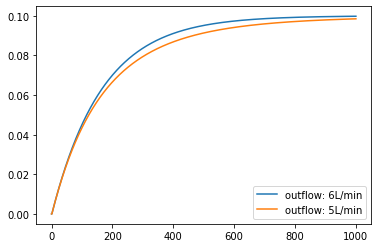

In [5]:
# outflow with 6L/min
tank_conc, time_list = forward_euler_tank(1000, 6, 6, 0.1)
plt.plot(time_list, tank_conc, label="outflow: 6L/min")

# outflow with 5L/min
tank_conc, time_list = forward_euler_tank(1000, 6, 5, 0.1)
plt.plot(time_list, tank_conc, label="outflow: 5L/min")

plt.legend()
plt.show()